In [1]:
import numpy as np
import os
import gradio as gr
import cv2 
import matplotlib.pyplot as plt
import torch

In [2]:
def process_image(img):
    img = cv2.resize(img, (224, 224))/225.0
    img = torch.from_numpy(img)
    img = img.permute(2, 0, 1).float()
    return img[None]
    

In [3]:
def load_model(file_path = "facial_modelv2.pt"):
    model = torch.load(file_path)
    return model.to("cpu")

In [4]:
model = load_model()

In [5]:
def predict(img):
    img = process_image(img)
    with torch.no_grad():
        facial_keys = model(img)
    facial_keys = facial_keys.detach().numpy()[0]*224.0
    x_points = facial_keys[:68]
    y_points = facial_keys[68:]
    fig, ax = plt.subplots()
    ax.imshow(img.squeeze().permute(1, 2, 0).numpy())
    ax.scatter(x_points, y_points, s= 25)
    #ax.set_xlim([0, 224])
    #ax.set_ylim([0, 224])
    ax.axis("off")
    fig.savefig("out.png", bbox_inches="tight", pad_inches=0)
    image = cv2.imread("out.png", cv2.COLOR_BGR2RGB)
    image = cv2.resize(image , (300, 300))
    return image[:,:,::-1]

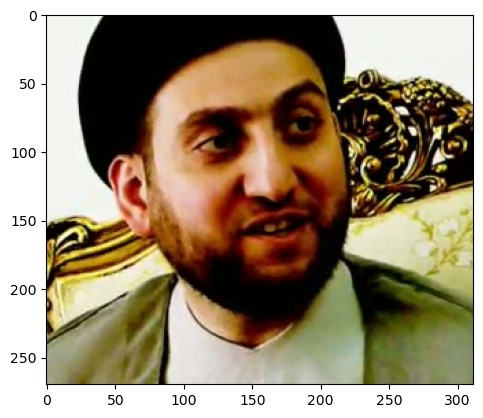

In [6]:
test_file = "P1_Facial_Keypoints/data/test/Abdel_Aziz_Al-Hakim_00.jpg"
img = cv2.imread(test_file , cv2.COLOR_BGR2RGB)[:,:,::-1]
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


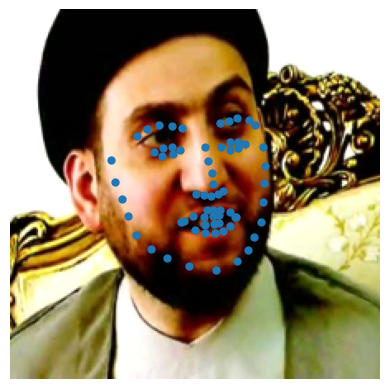

In [7]:
res = predict(img)

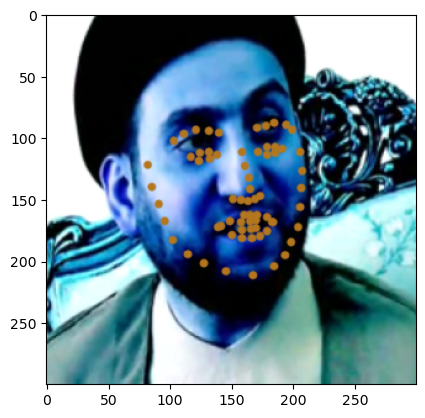

In [8]:
plt.imshow(res[:,:,::-1])

In [9]:
examples =["P1_Facial_Keypoints/data/test/Abdullah_Gul_31.jpg",
           "P1_Facial_Keypoints/data/test/Abdel_Aziz_Al-Hakim_41.jpg",
           "P1_Facial_Keypoints/data/test/Ahmad_Masood_00.jpg",
           "P1_Facial_Keypoints/data/test/Albert_Brooks_30.jpg"]


In [10]:
demo = gr.Interface(fn = predict , inputs=gr.Image(type="numpy"),
                    outputs=gr.Image(type="numpy"),
                    examples=examples)



In [11]:
if __name__ == "__main__":
    demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [14]:

demo.close()

Closing server running on port: 7860
